In [45]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

Sea Temp:

Edmunds, P. J. (2020) Seawater temperature between Cabritte Horn and White Point on the south shore of St. John, US Virgin Islands, 1996-2018. Biological and Chemical Oceanography Data Management Office (BCO-DMO). (Version 1) Version Date 2020-10-28 [if applicable, indicate subset used]. doi:10.26008/1912/bco-dmo.827812.1 [access date]

<AxesSubplot:xlabel='year'>

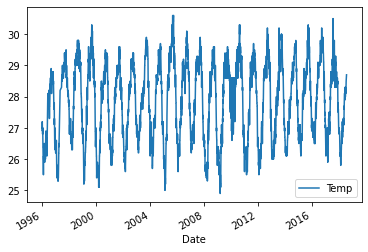

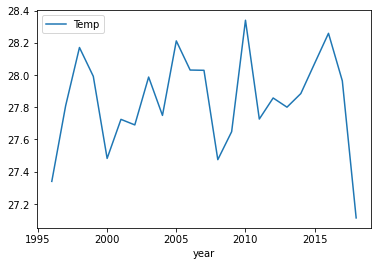

In [46]:
data = pd.read_csv("L_O_seawater_temp.csv", index_col = "Date")
data.sort_index(inplace = True)
data = data[1:]
temp_data = data[data['Temp'] != 'nd'].astype(float)
temp_data.index = pd.to_datetime(temp_data.index)
temp_data['year'] = temp_data.index.year
temp_data.plot(y = 'Temp')

year_means = temp_data.groupby(['year']).mean()
year_means.plot()

In [47]:
sea_df = pd.read_csv("seawatertemp.csv", index_col = "Date") #read in the dataset 
sea_df.index = pd.to_datetime(sea_df.index)
sea_df['year_column'] = sea_df.index.year
sea_df = sea_df[sea_df['Site'].isin(['Yawzi_NPS','Yawzi_9m'])]
specific_value_count = sea_df['Temperature'].value_counts()['nd']
# print(specific_value_count)
sea_df = sea_df[sea_df['Temperature'] != 'nd']
sea_df['Temperature'] = sea_df['Temperature'].astype(float)
avg_sea_temp = sea_df.groupby('year_column')['Temperature'].mean()
avg_sea_temp
# avg_sea_temp.plot()

year_column
1989    27.153627
1990    27.421425
1991    27.324986
1992    27.485410
1993    27.564384
1994    27.395973
1995    27.806966
1996    27.342350
1997    27.808127
1998    28.170986
1999    27.994685
2000    27.482548
2001    27.725918
2002    27.691342
2003    27.361349
2004    28.469801
2005    28.213955
2006    28.030083
2007    28.029944
2008    27.474306
2009    27.650138
2010    28.339280
2011    27.727008
2012    27.858338
2013    27.045025
2014    28.770303
2015    28.070670
2016    27.617150
Name: Temperature, dtype: float64

In [48]:
df = pd.read_csv("coral_dataset.csv", index_col = "Date") #read in the dataset 
df = df[df['percentCover_CTB'] != 'nd'] #drop all of the rows with these entries and then print out the amount of rows in our dataset
df = df[df['percentCover_macroalgae'] != 'nd']
df = df[df['percentCover_allCoral'] != 'nd']
columns_to_cast = ['percentCover_CTB', 'percentCover_macroalgae', 'percentCover_allCoral'] #get a list of the columns that we want to cast
df[columns_to_cast] = df[columns_to_cast].astype(float) #cast these columns as floats and divide by 100 to make the percents 
df[columns_to_cast] = df[columns_to_cast]/100
df['percentCover_other'] = 1 - (df['percentCover_CTB']+df['percentCover_macroalgae']) #add in another column for other types of coral
df.index = pd.to_datetime(df.index)
df['year_column'] = df.index.year

df_tektite = df[df['site']=='Tektite']
avg_percent_cover_allcoral_tektite = df_tektite.groupby('year_column')['percentCover_allCoral'].mean()

z = np.diff(avg_percent_cover_allcoral_tektite)

In [49]:
comb_data = pd.concat([avg_percent_cover_allcoral_tektite,avg_sea_temp],axis = 1)

In [50]:
comb_data = comb_data.dropna()

In [51]:
comb_data

,percentCover_allCoral,Temperature
year_column,,
1989,0.370750,27.153627
1990,0.388600,27.421425
1991,0.390367,27.324986
1992,0.375278,27.485410
1993,0.391400,27.564384
1994,0.398300,27.395973
1995,0.388500,27.806966
1996,0.389194,27.342350
1997,0.416667,27.808127


In [52]:


# # Assuming df is your DataFrame with columns coral_coverage and temperature
# # For simplicity, let's assume both columns are numeric and can be directly used.

# # Step 1: Define State Space Model
# dt = 1.0  # time step

# # State transition matrix (we assume a simple model where both coral coverage and temperature evolve independently)
# F = np.array([[1, dt],
#               [0, 1]])

# # Observation matrix (we directly observe both coral coverage and temperature)
# H = np.array([[1, 0],
#               [0, 1]])

# # Process noise covariance (assumed to be diagonal for simplicity)
# Q = np.diag([0.1, 0.1])

# # Measurement noise covariance (assumed to be diagonal for simplicity)
# R = np.diag([0.1, 0.1])

# # Step 2: Initialize Kalman Filter
# kf = KalmanFilter(dim_x=2, dim_z=2)
# kf.x = np.array([0, 0])  # initial state estimate
# kf.P = np.eye(2)         # initial covariance estimate
# kf.F = F
# kf.H = H
# kf.Q = Q
# kf.R = R

# # Step 3: Iterate Through Data
# predictions = []
# for index, row in comb_data.iterrows():
#     # Predict step
#     kf.predict()

#     # Update step
#     kf.update(row[['percentCover_allCoral', 'Temperature']].values)
#     # Save the predicted state
#     predictions.append(kf.x)

# # Step 4: Predict Future Data (Optional)
# # You can predict future data by simply calling kf.predict() multiple times
# # after the last observed data point.

# # Convert predictions to DataFrame
# print(len(predictions))
# predicted_df = pd.DataFrame(predictions, columns=['percentCover_allCoral', 'Temp'], index=comb_data.index)

# print(predicted_df)


In [53]:
# predicted_df.plot(y = 'percentCover_allCoral')

In [54]:

class KalmanFilter(object):
    def __init__(self,F,Q,H,R,u):
        """
        Initialize the dynamical system models.
        
        Parameters
        ----------
        F : ndarray of shape (n,n)
            The state transition model.
        Q : ndarray of shape (n,n)
            The covariance matrix for the state noise.
        H : ndarray of shape (m,n)
            The observation model.
        R : ndarray of shape (m,m)
            The covariance matrix for observation noise.
        u : ndarray of shape (n,)
            The control vector.
        """
        #save attributes
        self.F=F
        self.Q=Q
        self.H=H
        self.R=R
        self.u=u
    
    def evolve(self,x0,N):
        """
        Compute the first N states and observations generated by the Kalman system.

        Parameters
        ----------
        x0 : ndarray of shape (n,)
            The initial state.
        N : integer
            The number of time steps to evolve.

        Returns
        -------
        states : ndarray of shape (n,N)
            The i-th column gives the i-th state.
        obs : ndarray of shape (m,N)
            The i-th column gives the i-th observation.
        """
        #initialize states matrix
        n=len(x0)
        #print(np.array([self.H@x0]))
        m=len(np.array([self.H@x0]))
        states=np.zeros((n,N))
        states[:,0]=x0
        obs=np.zeros((m,N))
        obs[:,0]=self.H@(states[:,0])
        for i in range(1,N):
            #get noise
            w=np.random.multivariate_normal(np.zeros_like(states[:,0]), self.Q)
            v=np.random.multivariate_normal(np.zeros_like(obs[:,0]), self.R)
            #update states
            states[:,i]=self.F@states[:,i-1]+self.u+w
            #update obs
            obs[:,i]=self.H@states[:,i]+v
        return states, obs

    def estimate(self,x0,P0,z, return_norms = False):
        """
        Compute the state estimates using the kalman filter.

        Parameters
        ----------
        x0 : ndarray of shape (n,)
            The initial state estimate.
        P0 : ndarray of shape (n,n)
            The initial error covariance matrix.
        z : ndarray of shape(m,N)
            Sequence of N observations (each column is an observation).

        Returns
        -------
        out : ndarray of shape (n,N)
            Sequence of state estimates (each column is an estimate).
        """
        #initialize states matrix
        n=len(x0)

        m,N=1,2
        states=np.zeros((n,N))
        P=P0
        states[:,0]=x0
        # hidden_states = np.zeros((n, N))
        #iterate to get states
        for i in range(1,N):
            #predict phase
            xkk1=self.F@states[:,i-1]+self.u
            Pkk1=self.F@P@self.F.T+self.Q
            #update step
            y=z[i]-self.H@xkk1
            S=self.H@Pkk1@self.H.T+self.R

            K=(Pkk1@self.H.T)@inv(S)
            states[:,i]=xkk1+K@y

            # hidden_states[:, i] = self.F @ states[:, i - 1] + self.u

            P=(np.eye(n)-K@self.H)@P
        return states, hidden_states
            
    
    def predict(self,x,k):
        """
        Predict the next k states in the absence of observations.

        Parameters
        ----------
        x : ndarray of shape (n,)
            The current state estimate.
        k : integer
            The number of states to predict.

        Returns
        -------
        out : ndarray of shape (n,k)
            The next k predicted states.
        """
        #initialize states matrix
        n=len(x)
        states=np.zeros((n,k))
        states[:,0]=self.F@x+self.u
        #iterate to get k next steps
        for i in range(1,k):
            states[:,i]=self.F@states[:,i-1]+self.u
        return states
    
    def rewind(self,x,k):
        """
        Predict the states from time 0 through k-1 in the absence of observations.
    
        Parameters
        ----------
        x : ndarray of shape (n,)
            The state estimate at time k.
        k : integer
            The current time step.
    
        Returns
        -------
        out : ndarray of shape (n,k)
            The predicted states from time 0 up through k-1 (in that order).
        """
        #get F^-1
        Finv=inv(self.F)
        n=len(x)
        states=np.zeros((n,k))
        #get most previous step
        states[:,-1]=Finv@(x-self.u)
        #iterate to get k steps
        for i in range(k-2,-1,-1):
            states[:,i]=Finv@(states[:,i+1]-self.u)
        return states


In [55]:
import numpy as np
from numpy.linalg import inv
from scipy.stats import multivariate_normal

In [56]:
import numpy as np
from numpy.linalg import inv

class KalmanFilterEM(KalmanFilter):
    def __init__(self, F_guess, Q, H_guess, R, u):
        super().__init__(F_guess, Q, H_guess, R, u)
    
    def fit(self, x0, P0, z, max_iter=100, tol=1e-6):
        F = self.F
        H = self.H
        for _ in range(max_iter):
            # E-step
            x_est = self.estimate(x0, P0, z)
            
            # M-step
            F_new, H_new = self._maximize(x_est, z)
            
            # Check convergence
            if np.allclose(F, F_new, atol=tol) and np.allclose(H, H_new, atol=tol):
                break
                
            F = F_new
            H = H_new
        
        return F, H
    
    def _maximize(self, x_est, z):
        # Update F using the estimate
        F_new = np.dot(np.dot(x_est[:, 1:], np.linalg.inv(x_est[:, :-1])), np.linalg.inv(self.u))
        
        # Update H using the estimate
        H_new = np.dot(z, np.linalg.pinv(x_est))
        
        return F_new, H_new


In [57]:
F_guess = np.array([[1,1],[.1,1]])
H_guess = np.array([1,0])
Q = np.eye(2)*.1
R = np.eye(1)*.1
u = np.zeros(2)
x0 = comb_data.iloc[0]
P0 = np.eye(2)
N = 100
kf = KalmanFilterEM(F_guess, Q, H_guess, R, u)
z = comb_data

states,obs = kf.evolve(x0,N)

estimated_F, estimated_H = kf.fit(x0, P0, obs)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [58]:
# num_measurements = 2
# num_hidden_states = 10
# num_time_steps = len(comb_data)

# # Initialize parameters H and A
# # You can initialize them randomly or using some prior knowledge
# H = np.random.rand(num_measurements, num_measurements)
# A = np.random.rand(num_measurements, num_measurements)

# # EM algorithm
# for _ in range(10):
#     # # E-step: Estimate hidden states using the current parameters
#     # hidden_states = []
#     # for measurement in data:
#     #     # Use the current parameters to estimate hidden states
#     #     # Implement Kalman filter to estimate hidden states
#     #     hidden_states.append(kalman_filter_estimate(measurement, H, A))
    
#     # # M-step: Update parameters to maximize likelihood
#     # # Update H and A using the estimated hidden states
#     # # For example, you can use maximum likelihood estimation
#     # # M-step: Update parameters to maximize likelihood

#     # Update H
#     for i in range(num_measurements):
#         for j in range(num_hidden_states):
#             # Compute covariance matrix between measurement i and hidden state j
#             cov_matrix = np.zeros((2, 2))
#             for t in range(num_time_steps):
#                 kf = KalmanFilter(A,Q,H,R,u)
#                 states, hidden_states = kf.estimate(comb_data.iloc[t],np.eye(2), np.zeros((2,2)))
                
#                 # Estimate expected values of measurement and hidden state using Kalman filter
#                 expected_measurement = states
#                 expected_hidden_state = hidden_states
                
#                 # Compute covariance matrix
#                 measurement_deviation = comb_data.iloc[t,i] - expected_measurement
#                 hidden_state_deviation = hidden_states[t][:, j] - expected_hidden_state
#                 cov_matrix += np.outer(measurement_deviation, hidden_state_deviation)
#             cov_matrix /= num_time_steps
            
#             # Compute covariance matrix of hidden state j
#             cov_hidden_state_j = np.cov(hidden_states[:, j])

#             # Extract variance of hidden state j from the covariance matrix
#             var_hidden_state = cov_hidden_state_j[j, j]
            
#             # Update H
#             H[i, j] = cov_matrix / var_hidden_state


#     # Update A
#     for i in range(num_hidden_states):
#         for j in range(num_hidden_states):
#             # Count transitions from state i to state j
#             count_transition = 0
#             for t in range(num_time_steps - 1):
#                 if hidden_state[t, i] == 1 and hidden_state[t+1, j] == 1:
#                     count_transition += 1
            
#             # Compute transition probability
#             transition_probability = count_transition / num_time_steps
            
#             # Update A
#             A[i, j] = transition_probability

    
#         # Repeat until convergence

# # Estimated parameters H and A
# print("Estimated H:", H)
# print("Estimated A:", A)


In [59]:

class KalmanFilter(object):
    def __init__(self,F,Q,H,R,u):
        """
        Initialize the dynamical system models.
        
        Parameters
        ----------
        F : ndarray of shape (n,n)
            The state transition model.
        Q : ndarray of shape (n,n)
            The covariance matrix for the state noise.
        H : ndarray of shape (m,n)
            The observation model.
        R : ndarray of shape (m,m)
            The covariance matrix for observation noise.
        u : ndarray of shape (n,)
            The control vector.
        """
        #save attributes
        self.F=F
        self.Q=Q
        self.H=H
        self.R=R
        self.u=u
    
    def evolve(self,x0,N):
        """
        Compute the first N states and observations generated by the Kalman system.

        Parameters
        ----------
        x0 : ndarray of shape (n,)
            The initial state.
        N : integer
            The number of time steps to evolve.

        Returns
        -------
        states : ndarray of shape (n,N)
            The i-th column gives the i-th state.
        obs : ndarray of shape (m,N)
            The i-th column gives the i-th observation.
        """
        #initialize states matrix
        n=len(x0)
        m=len(self.H@x0)
        states=np.zeros((n,N))
        states[:,0]=x0
        obs=np.zeros((m,N))
        obs[:,0]=self.H@(states[:,0])
        for i in range(1,N):
            #get noise
            w=np.random.multivariate_normal(np.zeros_like(states[:,0]), self.Q)
            v=np.random.multivariate_normal(np.zeros_like(obs[:,0]), self.R)
            #update states
            states[:,i]=self.F@states[:,i-1]+self.u+w
            #update obs
            obs[:,i]=self.H@states[:,i]+v
        return states, obs

    def estimate(self,x0,P0,z, return_norms = False):
        """
        Compute the state estimates using the kalman filter.

        Parameters
        ----------
        x0 : ndarray of shape (n,)
            The initial state estimate.
        P0 : ndarray of shape (n,n)
            The initial error covariance matrix.
        z : ndarray of shape(m,N)
            Sequence of N observations (each column is an observation).

        Returns
        -------
        out : ndarray of shape (n,N)
            Sequence of state estimates (each column is an estimate).
        """
        #initialize states matrix
        n=len(x0)
        m,N=z.shape
        states=np.zeros((n,N))
        P=P0
        states[:,0]=x0
        #iterate to get states
        for i in range(1,N):
            #predict phase
            xkk1=self.F@states[:,i-1]+self.u

            Pkk1=self.F@P@self.F.T+self.Q
            #update step
            # print(self.H.shape)
            # print(xkk1.shape)
            y=z[:,i]-self.H@xkk1
            # print(z[:,1])
            # print(self.H@np.array([xkk1]))
            # print(y[:,0])

            # print(Pkk1.shape)
            
            S=self.H@Pkk1@self.H.T+self.R
            K=Pkk1@self.H.T@inv(S)
            # print(xkk1.shape)
            # print(K.shape)
            # print(y.shape)
            # print(self.H.shape)
            #print(K.shape, y.shape)
            states[:,i]=xkk1+K@y
            P=(np.eye(n)-K@self.H)@P
        return states
            
    
    def predict(self,x,k):
        """
        Predict the next k states in the absence of observations.

        Parameters
        ----------
        x : ndarray of shape (n,)
            The current state estimate.
        k : integer
            The number of states to predict.

        Returns
        -------
        out : ndarray of shape (n,k)
            The next k predicted states.
        """
        #initialize states matrix
        n=len(x)
        states=np.zeros((n,k))
        states[:,0]=self.F@x+self.u
        #iterate to get k next steps
        for i in range(1,k):
            states[i]=self.F@states[i-1]+self.u
        return states
    
    def rewind(self,x,k):
        """
        Predict the states from time 0 through k-1 in the absence of observations.
    
        Parameters
        ----------
        x : ndarray of shape (n,)
            The state estimate at time k.
        k : integer
            The current time step.
    
        Returns
        -------
        out : ndarray of shape (n,k)
            The predicted states from time 0 up through k-1 (in that order).
        """
        #get F^-1
        Finv=inv(self.F)
        n=len(x)
        states=np.zeros((n,k))
        #get most previous step
        states[-1]=Finv@(x-self.u)
        #iterate to get k steps
        for i in range(k-2,-1,-1):
            states[i]=Finv@(states[i+1]-self.u)
        return states



class KalmanFilterEM(KalmanFilter):
    def __init__(self, F_init, Q_init, H_init, R_init, u_init):
        super().__init__(F_init, Q_init, H_init, R_init, u_init)

    def fit(self, observations, max_iter=100, tol=1e-4):
        """
        Fit the Kalman filter model using the EM algorithm.

        Parameters
        ----------
        observations : ndarray of shape (m, N)
            Sequence of N observations (each column is an observation).
        max_iter : integer, optional
            Maximum number of EM iterations.
        tol : float, optional
            Convergence tolerance.

        Returns
        -------
        F : ndarray of shape (n, n)
            The estimated state transition model.
        H : ndarray of shape (m, n)
            The estimated observation model.
        """
        # Initialize F and H with the provided initial values
        F = self.F
        H = self.H

        prev_ll = -np.inf
        for _ in range(max_iter):
            # E-step: Predict states and covariance matrices
            states = self.estimate(observations[:,0], np.eye(len(self.F)), observations)
            
            
            # M-step: Update F and H
            F_new, H_new = self._maximize(observations, states)

            # Compute log-likelihood
            ll = self._log_likelihood(observations, states, F_new, H_new)

            # Check for convergence
            if np.linalg.norm(ll - prev_ll) < tol:
                break

            # Update parameters for the next iteration
            F = F_new
            H = H_new
            prev_ll = ll

        return F, H

    def _maximize(self, observations, states):
        """
        Maximize the expected log-likelihood to update F and H.

        Parameters
        ----------
        observations : ndarray of shape (m, N)
            Sequence of N observations (each column is an observation).
        states : ndarray of shape (n, N)
            Sequence of state estimates (each column is an estimate).

        Returns
        -------
        F_new : ndarray of shape (n, n)
            Updated state transition model.
        H_new : ndarray of shape (m, n)
            Updated observation model.
        """

        # print(states.shape)
        # states = np.array([states])
        # Update F
        F_new = np.mean(states[:, 1:] @ np.linalg.pinv(states[:, :-1]), axis=1)

        # print(observations.shape)
        # print(np.linalg.pinv(states @ states.T).shape)

        # Update H
        H_new = observations @ states.T @ np.linalg.pinv(states @ states.T)

        return F_new, H_new

    def _log_likelihood(self, observations, states, F, H):
        """
        Compute the log-likelihood of the observations.

        Parameters
        ----------
        observations : ndarray of shape (m, N)
            Sequence of N observations (each column is an observation).
        states : ndarray of shape (n, N)
            Sequence of state estimates (each column is an estimate).
        F : ndarray of shape (n, n)
            State transition model.
        H : ndarray of shape (m, n)
            Observation model.

        Returns
        -------
        ll : float
            Log-likelihood of the observations given the parameters.
        """
        residual = observations - H @ np.array(states)
        # print(residual.shape)
        cov_residual =np.cov(residual)
        # print("Shape of cov_residual:", cov_residual.shape)
        # print("Value of cov_residual:", cov_residual)

        ll = -0.5 * observations.shape[1] * (observations.shape[0] * np.log(2 * np.pi * cov_residual) + np.linalg.slogdet(cov_residual)[1])

        return ll


In [60]:
data = np.array(comb_data).T

In [61]:
# Assuming you have defined your comb_data array
n = 2
m = 2
# Initialize the KalmanFilterEM with initial values for F, Q, H, R, and u
# For demonstration purposes, let's initialize them randomly
F_init = np.random.randn(n, n)
Q_init = np.eye(n)*.1  # Identity matrix as initial covariance matrix for state noise
H_init = np.random.randn(m, n)
R_init = np.eye(m)*.1  # Identity matrix as initial covariance matrix for observation noise
u_init = np.zeros(n)  # Zero control vector

# Create an instance of KalmanFilterEM
kf_em = KalmanFilterEM(F_init, Q_init, H_init, R_init, u_init)

# Fit the model to your observed data (comb_data)
estimated_F, estimated_H = kf_em.fit(data)

# Now you have the estimated state transition model (F) and observation model (H)
print("Estimated F:")
print(estimated_F)
print("\nEstimated H:")
print(estimated_H)


Estimated F:
[-0.06994887  2.1370917 ]

Estimated H:
[[0.08457464 0.02647909]
 [6.37269161 1.98828477]]


In [ ]:
# F=np.linspace(.1,3,20)
# Q=np.linspace(0.001,0.01,2)
# H=np.linspace(0.1,3,20)
# R=np.linspace(0.001,.01,2)
# best_mse=np.inf
# for f in F:
#     for q in Q:
#         for h1 in H:
#             for h2 in H:
#                 for r in R:
#                     kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h1],[h2]]),r*np.eye(2),u=np.zeros(1))
#                     states, obs= kf.evolve([data[0,0]], 28)
#                     print(states.shape)
#                     print(obs.shape)
#                     mse = np.mean((np.array(obs) - data[0])**2)
#                     if mse < best_mse:
#                         best_mse = mse
#                         best_params = (f,q,h1,h2,r)
#                         beststates=states
#                         bestobs=obs
#                     #get observations and states

# #plot states
# plt.subplot(131)
# plt.plot(beststates[0], 'royalblue')
# plt.ylim(0,)
# plt.title('State Sequence')
# #plot observations
# plt.subplot(132)
# plt.title('Observation Sequence')
# plt.plot(bestobs[0], 'r')
# plt.ylim(0,)
# plt.subplot(133)
# plt.plot(percent_cover_all_coral)
# plt.tight_layout()
# plt.show()
# print(best_mse)
# print(best_params)

In [62]:
kf = KalmanFilter(estimated_F, Q_init, estimated_H, R_init, u_init)

In [63]:
kf.estimate(data[:,0],np.eye(2),np.array(data), return_norms = False)

array([[ 0.37075   ,  3.14944602,  3.25460073,  3.2766986 ,  3.28614853,
         3.26590148,  3.31530142,  3.25928075,  3.31551949,  3.35873574,
         3.33731967,  3.27601028,  3.3055863 ,  3.30134889,  3.26176421,
         3.39485296,  3.36338561,  3.34138335,  3.34134551,  3.27487245,
         3.29630013,  3.37879506,  3.30486371,  3.32113041,  3.22341139,
         3.43091897,  3.34577626,  3.29188642],
       [27.15362712,  3.76828257,  3.31919943,  3.32734237,  3.33688479,
         3.31720312,  3.36533039,  3.31150364,  3.36538397,  3.40956137,
         3.38973745,  3.32871689,  3.35609657,  3.35272236,  3.31359694,
         3.44365622,  3.41642557,  3.39393374,  3.39322569,  3.32768498,
         3.34689347,  3.42877744,  3.35827887,  3.37227019,  3.27632973,
         3.4781086 ,  3.40004939,  3.34465325]])

In [66]:
for k in range(data.shape[1]):
    H= kf.estimate(data[:,k],np.eye(2),np.array(data), return_norms = False)
    print(H)
#print(data)

[[ 0.37075     3.14944602  3.25460073  3.2766986   3.28614853  3.26590148
   3.31530142  3.25928075  3.31551949  3.35873574  3.33731967  3.27601028
   3.3055863   3.30134889  3.26176421  3.39485296  3.36338561  3.34138335
   3.34134551  3.27487245  3.29630013  3.37879506  3.30486371  3.32113041
   3.22341139  3.43091897  3.34577626  3.29188642]
 [27.15362712  3.76828257  3.31919943  3.32734237  3.33688479  3.31720312
   3.36533039  3.31150364  3.36538397  3.40956137  3.38973745  3.32871689
   3.35609657  3.35272236  3.31359694  3.44365622  3.41642557  3.39393374
   3.39322569  3.32768498  3.34689347  3.42877744  3.35827887  3.37227019
   3.27632973  3.4781086   3.40004939  3.34465325]]
[[ 0.3886      3.14808648  3.25456798  3.27669781  3.28614851  3.26590148
   3.31530142  3.25928075  3.31551949  3.35873574  3.33731967  3.27601028
   3.3055863   3.30134889  3.26176421  3.39485296  3.36338561  3.34138335
   3.34134551  3.27487245  3.29630013  3.37879506  3.30486371  3.32113041
   3.2234

import matplotlib.pyplot as plt
plt.plot()